# 3.2.1 Integration of $\exp{\left(-\frac{1}{2}x^2\right)}$
## Check Monte-Carlo convergence 

(1000,)
2.417977568767995


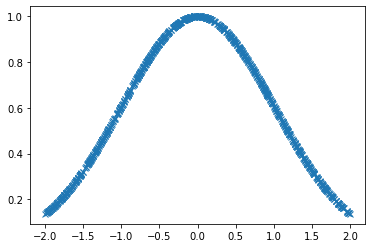

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x):
    return np.exp(-x**2/2)

N = 1000
X = np.random.uniform(low = -2, high = 2, size = N)
Y = np.vectorize(f)(X)
print(Y.shape)
I_N=4*np.sum(Y)/N
print(I_N)

plt.plot(X, Y, 'x')

In [2]:
Ns = 2**np.arange(4, 13, 1)
print(Ns)
trials = 200
mu_N = np.zeros((len(Ns), trials))
I = math.sqrt(2*math.pi)*math.erf(math.sqrt(2)) #right according to wolfram

for k, N in  enumerate(Ns): 
    for i in range(trials):
        X = np.random.uniform(low = -2, high = 2, size = N)
        Y = np.vectorize(f)(X)
        mu_N[k, i] = np.mean(Y)

print("analytical integral : ", I)


[  16   32   64  128  256  512 1024 2048 4096]
analytical integral :  2.3925760266452163


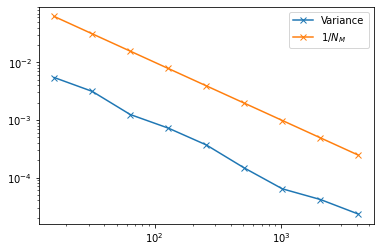

In [3]:
mean_N_trials = np.mean(mu_N, axis = 1)
var_N_trials=1/(trials-1)*np.sum((mu_N-mean_N_trials[:, np.newaxis])**2, axis=1)
var = np.var(mu_N, axis = 1)
plt.plot(Ns, var_N_trials, '-x')
plt.plot(Ns, 1/Ns, '-x')
plt.yscale('log')
plt.xscale('log')
plt.legend(["Variance", r"$1/{N_M}$"])